# Vision Transformer
---

### 어텐션 메커니즘(Attention mechanism)  
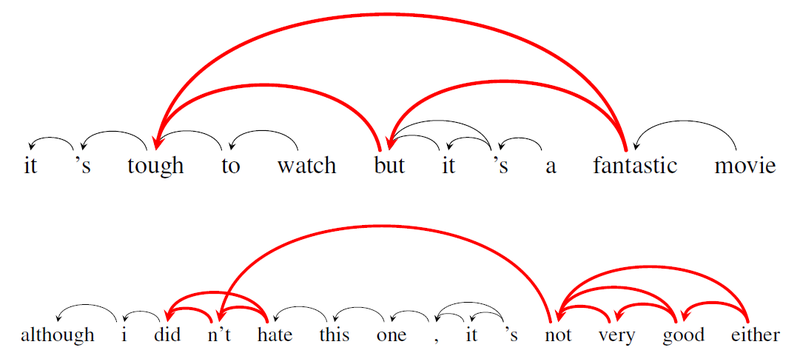  

자연어 처리(Natural Language Processing, NLP) 분야에서 데이터의 밀집 벡터 표현(Dense Vector Representation)을 효율적으로 다룰 수 있는 메커니즘  

입력 데이터의 길이에 영향을 적게 받고, 미묘하고 복잡해보이는 표현들도 세밀하게 구분하는 능력을 보여준 어텐션 메커니즘은   
트랜스포머(Transformer)라는 모델로 NLP 에서 이미 독보적인 성능을 보여주었다   
컴퓨터 비전(Computer Vision, CV)으로 영역을 넓혀 Convolution 기반의 레이어 구조들을 대체  

---
## Transformer 의 뛰어난 특성

### 1 입력처리가 유연하다
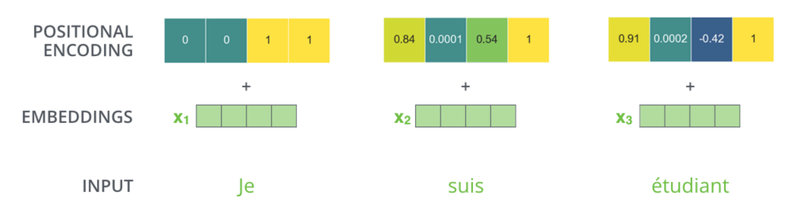  

어텐션을 활용하기 위해서는 입력 데이터에서 단어(텍스트형)들을 Token (숫자형) 으로 인코딩하고, Scalar 형태의 토큰들을 Vector 형태의 Embedding 으로 변환하는 작업을 거친다  
이를 통해 의미의 경계가 뚜렷하지 않은 아주 많은 종류의 단어(토큰)들도 상대적으로 적은 차원 형식을 통해 구분하여 활용할 수 있다  

[트랜스포머를 제안한 논문](https://arxiv.org/abs/1706.03762) 에서는,  
입력 데이터 시퀀스 안에서 각 단어들의 위치를 서로 구별하기 위하여 단어의 임베딩에 Positional encoding 을 더해준다.  
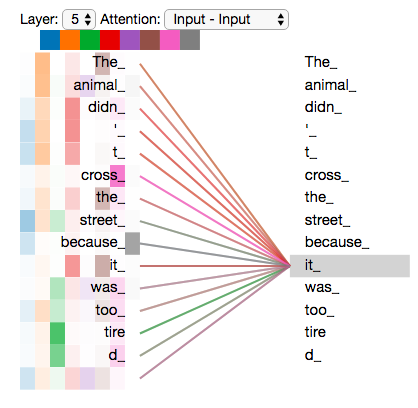  

위 그림은 self-attention을 통해 살펴본 각 단어들의 연관성(attention score)을 시각화한 자료  
입력된 문장 안에 있는 특정 단어와 나머지 단어들 사이의 연관성을 점수화하여 확인하는 과정  

그림의 왼쪽에 위치한 단어들을 표현한 8 가지 색(임베딩)이 담고있는 의미를 명확하게 구분하는 것은 직관적으로 쉽지않지만  
각 단어의 의미, 형식 위치 등의 정보를 내포하고 있음을 짐작할 수 있다  

### 2 스케일 가능한 아키텍쳐를 가지고 있다  
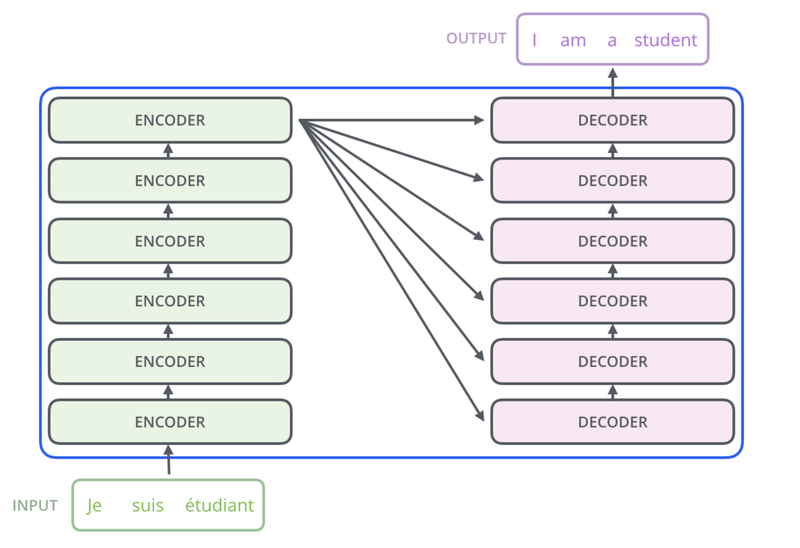  

트랜스포머의 주요 구조는 어텐션 레이어를 조합한 Encoder 와 Decoder 단위 구성체(Unit)로 이루어져있다  
이러한 유닛 구조는 몇 개의 유닛을 쌓느냐(stackable)에 따라 모델이 처리할 수 있는 정보의 스케일을 손쉽게 조정할 수 있다는 장점이 있다  

통상적으로 인코더 역할의 유닛은 입력 데이터로부터 특성들을 추출하여 정제하는 역할을 하고,  
디코더 유닛은 인코더에서 나온 정보와 이전 단계의 출력 함께 전달받아, 새로운 결과물을 만들어내는 기능을 한다  

### 3 병렬 처리에 유리하다 
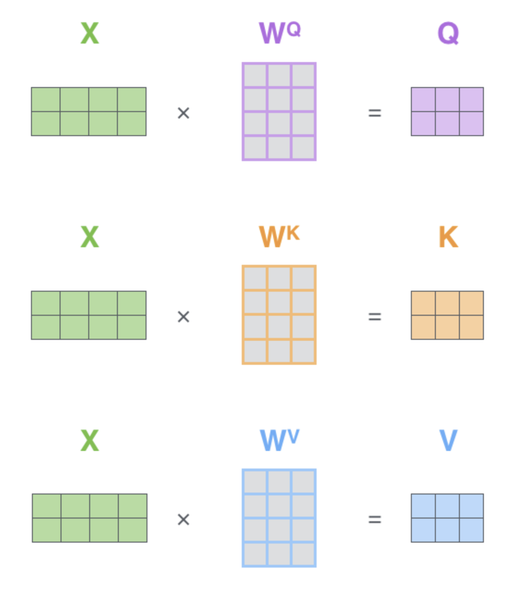  

트랜스포머로 입력된 임베딩은 또 다른 형태의 행렬들로 변환되어 각각 어텐션 계산 과정에 활용된다  
Self-attention 계산을 위해 필요한 요소로 Key, Query, Value 가 있으며,  
각 변환 과정에서는 적절한 크기의 가중치 행렬들이 함께 계산과정에 참여하게 된다  

트랜스포머를 이루는 대부분의 요소들이 행렬 형태로 전달되기 때문에,  
학습 과정에서 단순한 행렬 연산을 반복하면서 병렬로 연산을 처리하기에 용이하다는 특징을 가지게 된다  
이전보다 상대적으로 굉장히 많은 양의 데이터를 효율적으로 학습하게 되었으며,  
특히 모델과 데이터 사이에 연결된 내재적인 의미들을 확장하여 인식하는 데 빼어난 성능을 보이고 있다  

[Paper - Attention is All You Need, NIPS, 2017](https://arxiv.org/pdf/1706.03762.pdf)  
[Blog - The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)  

---
## Transformer 가 이미지를 구분하기 위해서는?

ViT(Vision Transformer) 는 이 과정을 간결하고도 성공적으로 수행해 낸 논문으로 평가된다  
특히 트랜스포머의 기존 내부 구조를 거의 변형하지 않고도 이미지 데이터를 입력 받을 수 있었다는 점에서 주된 의의를 갖는다  

![vit](img/vit.gif)

입력된 이미지는 특정한 변환작업을 거쳐 트랜스포머 인코더로 들어간다  
입력 데이터에서 패턴을 추출하는 역할의 트랜스포머 인코더 부분을 가져와 ViT 메인 구조로 활용  

인코더에서 정제되어 나온 출력 중 일부는 간단한 신경망 분류기에 넣어 최종적으로 클래스 분류 작업을 수행  

이러한 과정을 준비하기 위해서, 기존 트랜스포머에 사용되던 세 가지의 요소를 이미지라는 데이터 특성에 맞추어 변형해야 한다  

- Patch : 텍스트 토큰을 임베딩으로 변환 
- Class Token : 클래스 정보를 담은 특수 토큰
- Positional Encoding : 이미지 형식에 맞는 위치 정보

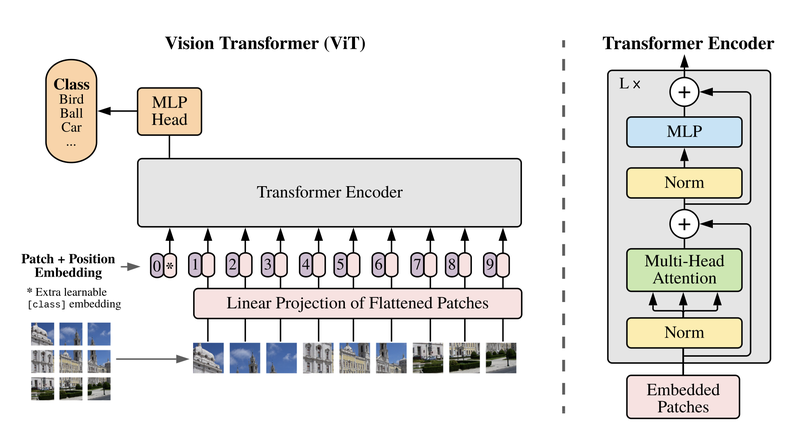  

먼저 입력 사이즈의 이미지를 더 작은 단위의 구성 요소인 패치 **Patch**로 나눈다  
이미지로부터 작게 나눠진 패치는 아직 행렬 형태이기 때문에, 시퀀스 데이터와 유사한 벡터 형태로 나열해주어야 한다  

왼쪽 위 시작점의 패치부터 순서대로 하나씩 정렬한 후, 데이터를 벡터 형태로 만드는 Flatten 작업을 거친다  

하나의 패치는 전체 이미지에서 부분적인 정보만을 담고 있지만   
트랜스포머 모델은 어텐션 계산 과정을 통해 각 패치들을 서로 비교하면서  
전체 이미지가 담고 있는 특성을 차근차근 파악해 나가게 된다

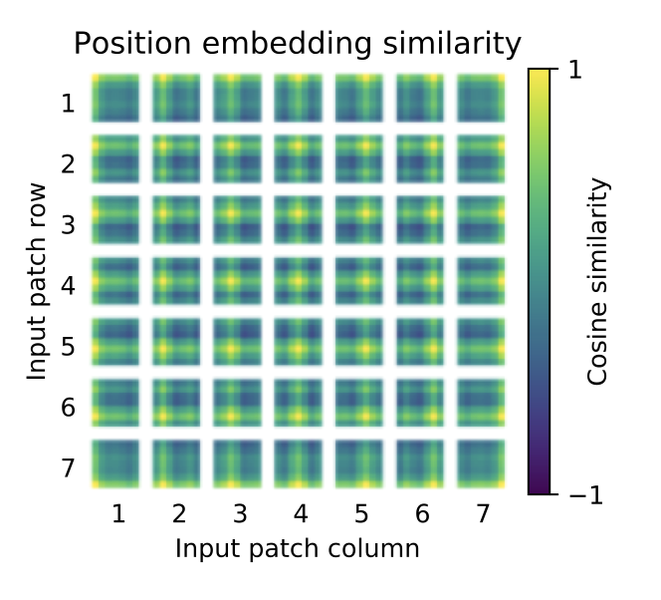  
Flatten 처리되어 벡터로 변형된 각 패치들은 Linear 연산을 통해 지정된 형태의 Embedding 으로 변환된다  

시퀀스 형태로 정렬된 임베딩 가장 앞 부분에 클래스 예측을 위한 **Class token embedding**을 추가  
데이터의 Label 로부터 만들어진 이 토큰은 이미지와 함께 입력되는 클래스 정보를 담고있으며,  
각기 다른 입력 데이터들을 구분하고 연관지어주는 열쇠로 작용하게 된다

클래스 토큰이 포함된 패치 임베딩에 지정된 형식의 **Positional embedding**
을 더해주면, 원본 이미지에서 패치들이 어느 위치에 있었는지에 대한 정보도 놓치지 않고 학습 과정에서 활용할 수 있게 된다  

[Visualization of Self-Attention Maps in Vision](https://epfml.github.io/attention-cnn/)  
[Papers with code - Image Classification on ImageNet](https://paperswithcode.com/sota/image-classification-on-imagenet)  


---
## Vit 성능

### ViT 의 장점과 단점

ViT의 구성을 간략하게 요약해보자면,  
이미지의 형태를 변경하는 임베딩 전처리 과정을 네트워크 앞부분에 덧붙이고,  
이미지 해석을 위한 백본 네트워크로 트랜스포머를 활용한 것  

이 과정에서 입출력 데이터의 형태가 동일한 트랜스포머의 특성을 거의 동일하게 유지하였으며,  
결과적으로 트랜스포머의 뛰어난 확장성을 유지할 수 있었다  

- 모듈식으로 이루어진 ViT 의 구성요소들은 내부 구조를 부분적으로 변경 용이
- 작업자가 설정한 문제 정의에 맞추어 자유롭게 스케일을 조정 가능


자연어 처리 분야에서 트랜스포머는  
비교적 긴 시퀀스 입력으로 인해 발생하는 **장기 의존성 문제(Long-term dependency problem)를 해결**하면서,  
**아주 큰 규모의 데이터셋을 학습하는데 유리**하다  

이미지 분류 문제에 도전한 ViT 도, 3 억 장의 이미지와 10 억 개의 레이블이 연결된(over one billion labels for the 300M images, a single image can have multiple labels) 커다란 규모의 JFT-300M 데이터셋을 효과적으로 학습할 수 있음을 보여주었다  

논문의 Table 2 에 제시된 모델과 데이터셋 별 성능비교 자료  
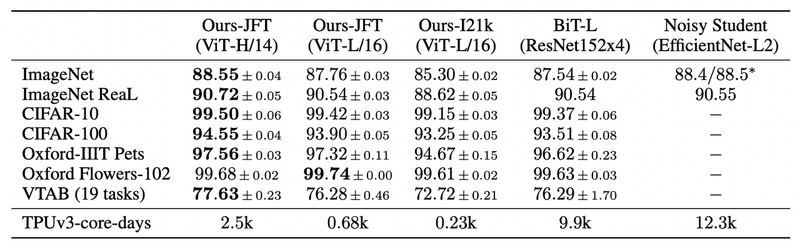  

비슷한 규모로 사전학습된 Convolution 기반 네트워크들(BiT-L, Noisy Student) 과 ViT를 비교했을 때,  
거의 모든 데이터셋에서 ViT가 더 우수한 성능과 빠른 학습속도를 보여줌을 확인할 수 있다  

core-days는 하루 당 학습에 필요한 코어의 갯수를 나타내며,  
현재 사용하는 연산장치의 코어 수를 core-days로 나눠주면 학습에 필요한 시간을 역으로 계산할 수 있다


#### 트랜스포머를 기반으로한 ViT  단점

**귀납적 편향 문제 Problem of inductive bias** : CNN, ViT 등 여러 학습 알고리즘을 비교하는 특성 중 하나

귀납적 편향이란 학습 알고리즘이 일반적인 상황에 적응하기 위해 사용하는 가정  
이러한 가정은 모델이 학습하는 데이터의 특성에 따라 선택  
> 예를 들어, RNN은 시간적인 순서가 중요하다는 가정을 가지고 있습니다. 
CNN은 이미지의 지역적인 특징이 중요하다는 가정을 가지고 있습니다. 
ViT는 이미지의 전역적인 관계가 중요하다는 가정을 가지고 있습니다.

컴퓨터 비전 분야의 뿌리가 되던 컨볼루션 레이어 기반의 모델보다 트랜스포머 기반의 모델이 귀납적 편향이 적다
> This seemingly discouraging outcome may be expected: Transformers lack some of the inductive biases inherent to CNNs, such as translation equivariance and locality, and therefore do not generalize well when trained on insufficient amounts of data. (Dosovitskiy et al., 2021) 이것은 겉으로 보기에 낙담할만한 결과라고 받아들여질 수 있습니다: 트랜스포머는 CNN 에 비해 병진 동등성(Translation equivariance) 및 지역성(Locality) 과 같은 CNN 고유의 귀납적 편향이 부족하여, 데이터 양이 충분하지 않은 상태에서 훈련하면 일반 일반화가 잘 이루어지지 않습니다.

서로 다른 방법론의 귀납적 편향을 비교하는 시각은,  
**수집 가능한 데이터의 종류나 형식에 따라 어떤 범위의 방식(모델)을 선택해야 성공적으로 문제를 해결할 수 있는가?**  
라는 물음에 대한 패러다임의 변화를 보여준다.
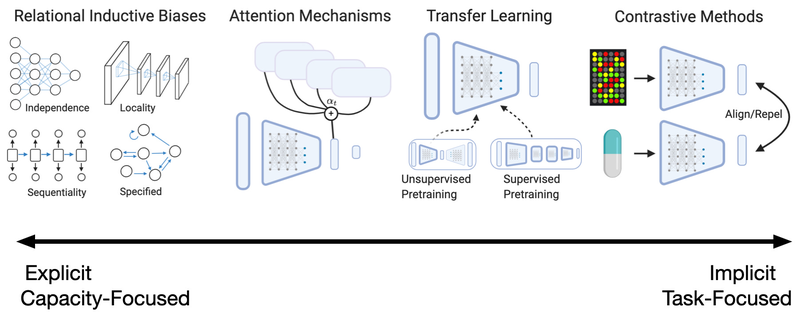  

기존의 CNN 모델들은 지역적인 특성을 검출하는 기능을 바탕으로 명시적이고 직관적인 Explicit 특성을 가진 반면  
ViT 는 이미지의 전역적인 관계성을 파악함으로써 내재적인 메시지나 추상적이고 감정적인 의미 등 Implicit 한 특성이 두드러진다  
> 귀납적 편향은 단점이라기보다 각 알고리즘의 특성이지만, 우리가 적용하고자 하는 문제의 정의에 맞춰 충분히 깊이 고민해봐야할 점



---
# Diffusion model
---
## 이미지 생성 모델의 분류
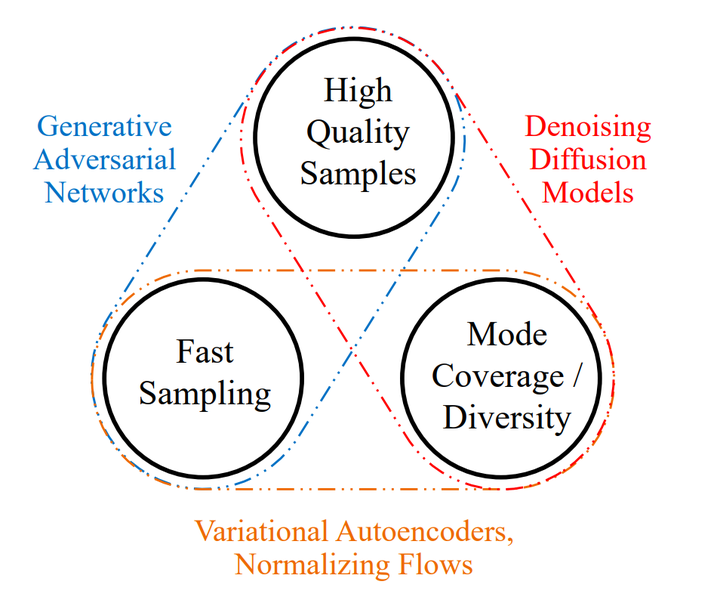  

컴퓨터 비전 분야에서 이미지를 활용한 생성 모델을 구성하는 방식은, 위 그림처럼 크게 세 분야로 나눠 볼 수 있다.
- Generative Adversarial Network (GAN)
- Variational AutoEncoder (VAE)
- Diffusion model

위 방법론들이 탄생하게된 계기나, 아이디어가 발전된 시기에서 차이가 나지만,  
각 모델들이 보여주는 다양한 퍼포먼스 특징들은 영역 별로 분명하게 나뉘어있다  
동시에, 아래 그림에서 같이 모델들이 구조적으로 서로 공유하고 있다  
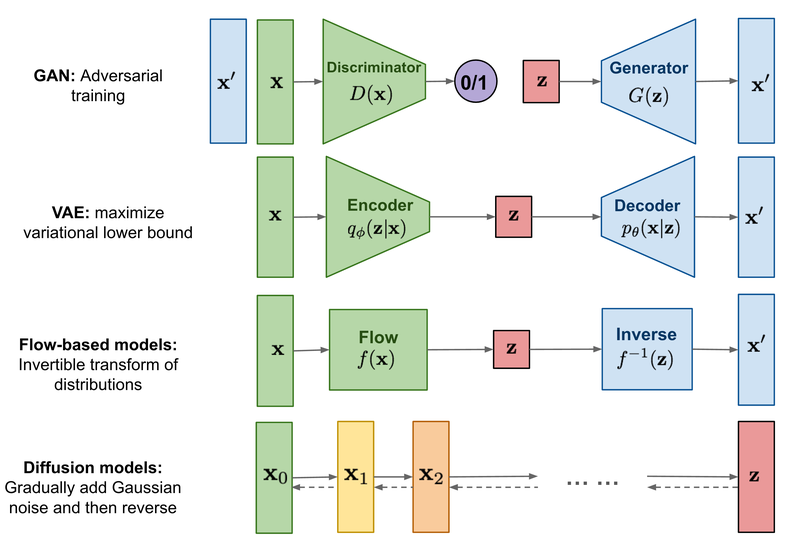  

디퓨전 기법에 큰 발자국을 남기고 있는 Stable Diffusion 모델을 활용하여 만들어진 ControlNet 이라는 모델이 만들어낸 결과물([논문](https://arxiv.org/abs/2302.05543))  
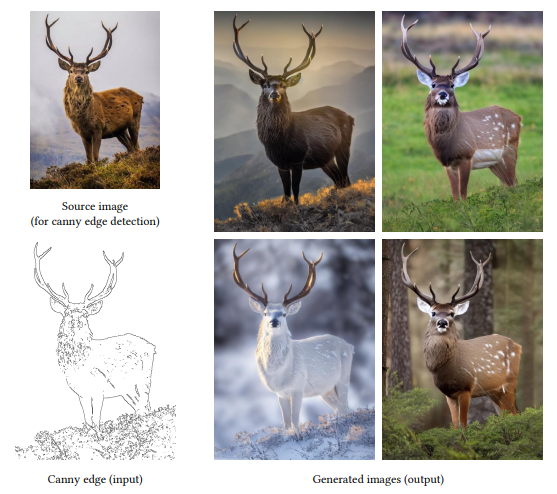
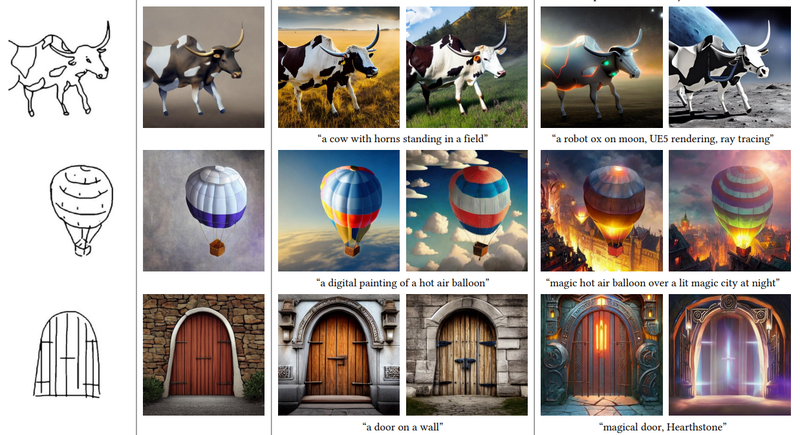

물체의 자세와 같이 동일한 조건에서 배경이나 물체의 특징 등 상세한 부분들을 자연스럽게 채워주는 것  
어떤 컨디션과 프롬프트를 조합하느냐에 따라 폭넓은 분야에 적용 가능
ControlNet 을 활용하면 아래와 같이 여러 종류의 작업들을 수행할 수 있다
- Unconditional Image Generation
- Text-Guided Image Generation : Prompt
- Text-Guided Image-to-Image Translation
- Text-Guided Image-Inpainting : Mask
- Text-Guided Depth-to-Image Translation : Depth map

### Text-Guided Image-Inpainting
Inpainting 은 마스크 데이터를 이용하여 편집하고 싶은 물체의 범위를 특정해주고,  
이미지 안에서 다른 요소들과 자연스럽게 어울리도록 변경해주는 작업  

텍스트 프롬프트에 알맞게 물체를 재구성하는 것 뿐만 아니라,  
물체로 가려지지 않는 부분을 원래 배경 요소에 맞추어 만들어줘야 하는 복합적인 작업  
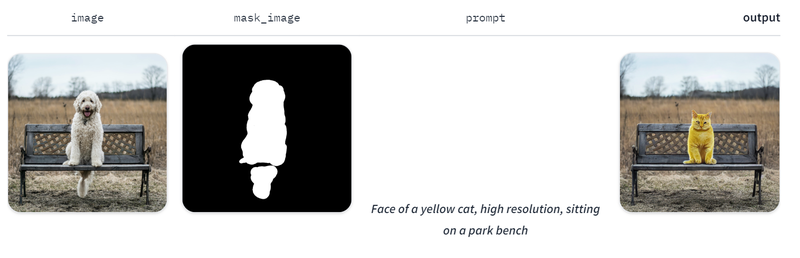
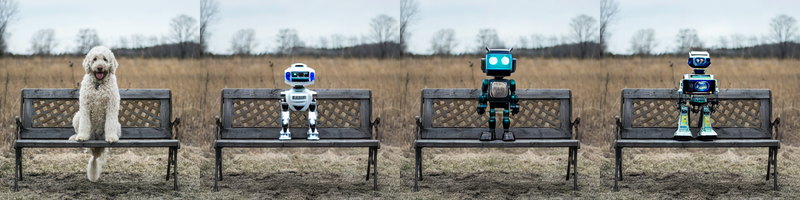  


### GAN 과 비교했을 때 디퓨전 모델의 장점
- 보다 더 안정적이고 빠르게 학습
- 보다 더 사실적이고 고품질의 이미지를 생성
- 다양한 특성이 함께 담겨있는 이미지를 생성
 
디퓨전 모델은 완전한 노이즈로부터 시작하여 이를 점차적으로 제거함으로써 새로운 이미지를 생성한다.
이미지 생성을 위한 디퓨전 모델의 학습하는 과정은 크게 **diffusion** 과 **denoising** process 두 부분

### diffusion process (forward process)
디퓨전 과정은 원본 이미지와 노이즈를 활용해 학습에 사용될 데이터를 만드는 과정입니다.

일정한 간격의 스텝 t 에 따라 원본 이미지에서부터 점차적으로 노이즈를 더해 섞어주면서,  
학습하려는 이미지와 노이즈 사이에 다수의 중간 단계를 만들어줍니다.

일반적으로 가우시안 분포를 활용하여 노이즈를 생성할 수 있고,  
동일한 과정을 다수 반복하면서 점진적으로 이미지를 변형(large number of small perturbation) 해가는 과정  

중간 단계의 스텝 수는 사용자가 직접 조정할 수 있는 하이퍼파라미터  
여러 가지 diffusion scheduling 기법을 활용하면 원본 이미지의 특성이 어느 스텝 시점까지 유지될 수 있을지도 조정이 가능  

디퓨전 과정은 하나의 데이터와 단일 프로세스를 이용하여, 동일한 내재적 특성을 공유하는 서로 다른 입력 데이터(latent variables)를 생산할 수 있다는 특징을 가진다

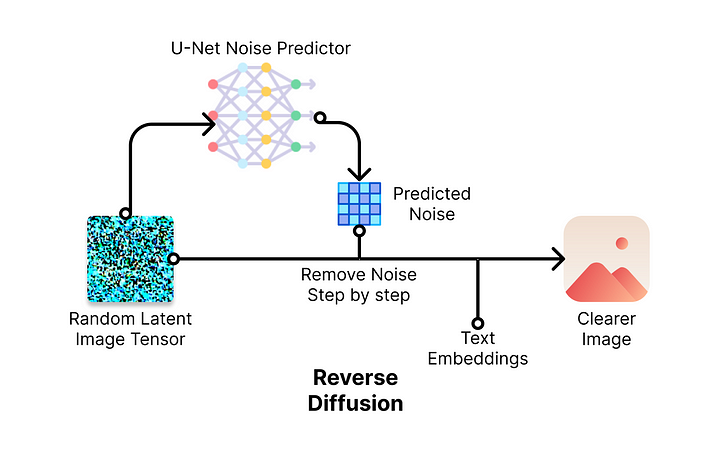  
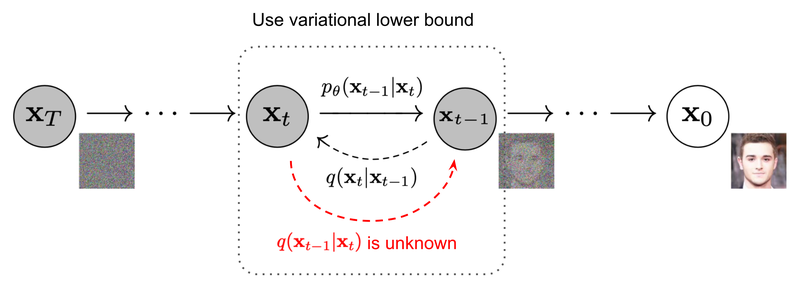  

### denoising process (backward process)
노이즈 제거 모델은 입력 데이터안에서 특정 분포의 노이즈를 제거하며 점차 더 선명한 이미지를 출력하는 작업을 반복  

위 그림과 같이 앞서 디퓨전 과정을 통해 제작한 t 와 t-1 시점의 노이즈가 포함되어 있는 이미지 데이터를 준비합니다.  
다음으로 t 스텝의 이미지를 입력받아 노이즈의 분포를 예측하고 제거할 noise predictor 를 설정  

이때 모델은 원본 이미지에 연결되어있던 text embedding 을 참고하여,  
노이즈를 제거하고 난 후 출력 이미지에 남겨둘 형상 정보들을 추정할 수 있다
이러한 단일 과정을 거치면서 t-1 스텝의 이미지는 공통된 내재적 특성을 유지할 수 있고,  
이미지 안에서 표현되어야할 세부 정보들을 발전시켜 나갈 수 있다  

t 와 t-1 시점의 입력 이미지들은 스텝 수 설정에 따라 충분히 학습을 거쳐 예측이 가능할 만큼 작은 차이들을 갖는다
전체 학습 과정을 반복하고나면 디노이징 모델이 랜덤한 노이즈부터 사전 조건에 맞춰 새로운 형태의 선명한 이미지들을 완성할 수 있다

![kRXOGzd](img/kRXOGzd.gif)

>디퓨전 모델의 주요 목적은 Loss 함수 설정에서 엿볼 수 있다.  
기존의 생성모델들과 차이점은 역시 노이즈 제거 과정이 차지하는 역할이 크다는 점  
최종적으로 생성된 이미지와의 차이도 중요하지만,  
디노이징 과정에서 우리가 타겟으로 삼은 데이터 분포를 잘 따라가고 있는지 확인하는 과정이 중요  


---
## Latent
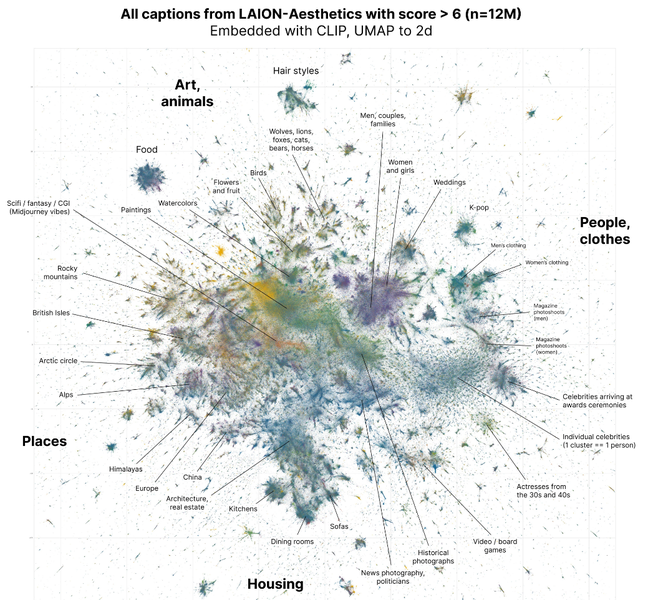  
SD 모델에서 활용되는 text encoder 인 CLIPText 내부의 Latent space 를 좀더 낮은 차원으로 변형하여 시각화한 모습  

다양하게 퍼져있는 데이터들 사이에서도 특정 구역 안에 커다랗게 또는 옹기종기 모인 데이터들의 군집
각각의 영역들에 People, Places, Art 등 큰 규모의 범주라거나, Paintings, Hymalayas, Magazine photoshoots 등 아주 세부적인 범주까지 이름 붙여놓은 것  
데이터가 담고 있는 특성들의 유사성을 검토할 수 있고 데이터 사이의 연관성을 더욱 간결하게 표현할 수 있다

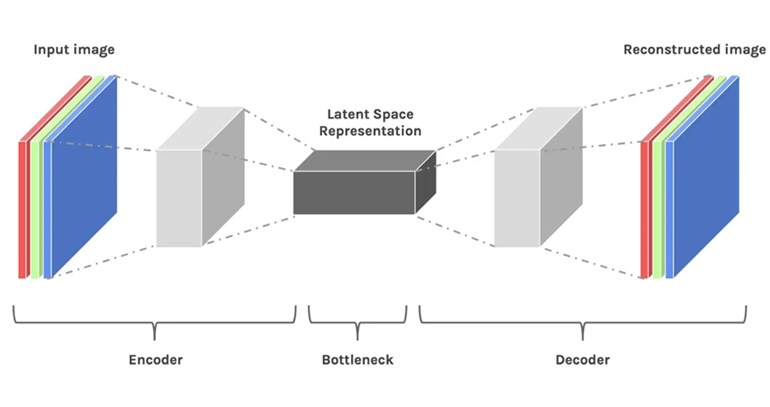  

하지만 너무 많은 특성을 동시에 담고있는 의미적 표현은, 관찰자가 데이터들을 직관적으로 인식하기 어렵게 만들 수도 있다  
이를 위해 우리는 데이터의 차원을 조금 낮추어, 데이터를 구별하는데 주효한 특성들만 남도록 모델의 구조를 설정할 수 있다  
또한 밀집 벡터 형식의 임베딩을 활용하면 연속적인 차원안에 우리가 원하는 데이터들을 동시에 나열하기에 용이하다  

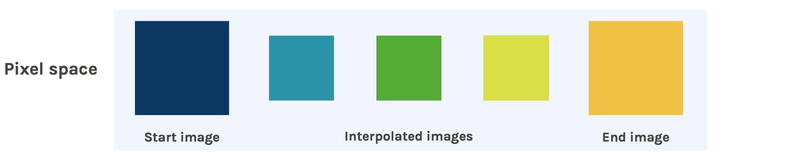  
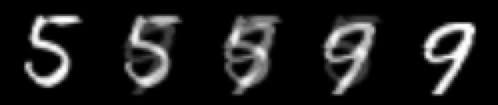  
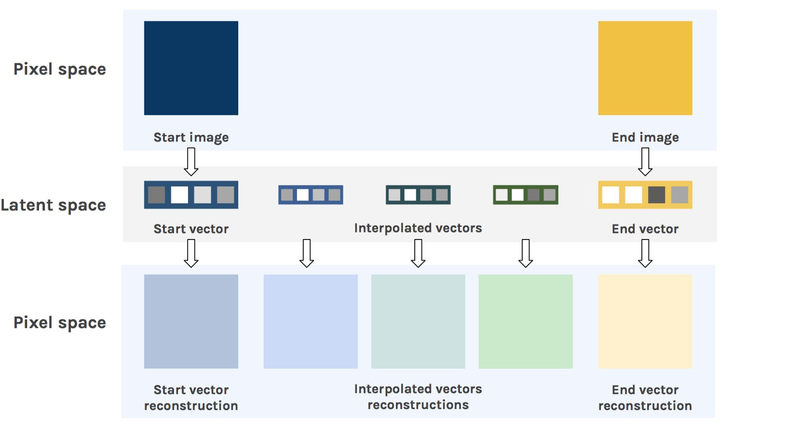  
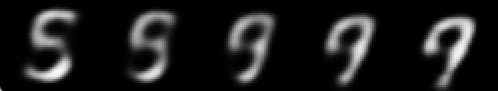  
![interpolation_in_latent](img/interpolation_in_latent.gif)

위의 그림들은, 두 데이터의 간 차이를 선형적으로 채워나가는 상황에서 각각 이미지 공간과 내재 공간을 활용하는 방법을 비교하고 있다  

이미지 공간에서 선형적으로 보간을 수행할 때는 두 가지의 형상이 서로 겹쳐진 채로 동시에 존재하며 보이지만,  
내재 벡터를 활용할 경우에 '손글씨로 적은 숫자' 라는 이미지적 특성을 유지한 채로 더 합리적이고 분명한 결과가 출력되는 것을 볼 수 있다  
(내재 벡터로부터 Reconstruction을 수행할 모델을 학습해야하는 추가 과정 생략)  

또한 벡터 표현들을 활용할 경우, 여러 특성들을 수치적으로 연산하여 간접적으로 조정할 수도 있다  

초기 디퓨전 모델은 고해상도의 이미지 데이터를 다루면서 동시에 아주 많은 스텝으로 나누어진 데이터를 활용하다 보니, 줄곧 학습 시간 등 연산에 필요한 자원량이 실용적이지 못하다는 점을 지적받아 왔다  

이렇듯 과도한 리소스가 필요한 디퓨전 모델의 접근성을 향상시키기 위해,  
representational space 를 활용한 **Latent Diffusion Model(LDM)** 이 제시되었다  

---
## Stable Diffusion

Stable diffusion 모델의 핵심인 디코더 구조  
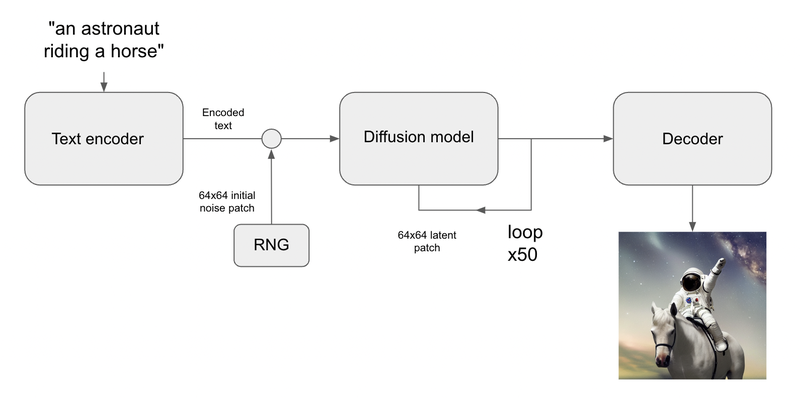  

Stable diffusion 은 2022년 OpenAI 에서 발표된 딥 러닝 기반의 이미지 생성 모델  

SD 모델은 diffusion & denoising process를 사용함으로써 이미지의 세부 사항을 잘 보존하면서도 다양한 스타일의 이미지를 생성할 수 있다

SD 모델은 잠재 공간을 적극적으로 활용  
잠재 공간을 통해 이미지의 고유한 특징을 효율적으로 저장 가능  
생성 과정에서 저장된 정보를 불러오기 위해 필요한 연산 비용을 획기적으로 축소  

Stable diffusion 은 Autoencoder, Noise predictor 를 포함하는 **LDM**, 제거할 노이즈의 분포를 예측하는 **Unet** 구조와 **ViT**,
텍스트와 이미지 임베딩을 구현하는 **CLIPText**, 샘플링(데이터 생성)을 위한 **DDPM** 혹은 **DDIM** 등 여러 구성요소가 조합된 시스템  

SD 는 하나의 모델이 아니기때문에, 활용하고자하는 데이터의 종류와 특성에 따라 conditioning 데이터를 다양하게 구성할 수 있다  

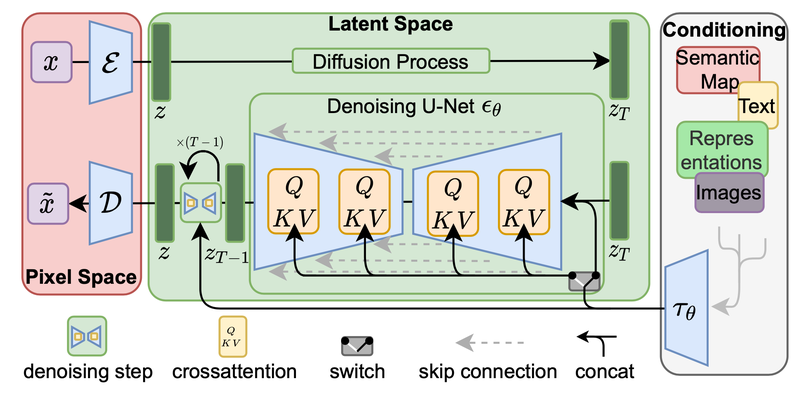  
> autoencoder 로 입력된 pixel Image 를 latent variable(z) 로 압축  
→ 저차원으로 압축된 latent space 수준에서 noise 를 첨가하는 diffusion process 수행  
→ CLIP 을 이용하여 image 와 text 를 같은 embedding 으로 결합  
→ 저차원의 latent variable 을 이용하여 빠르게 denoising diffusion 과정을 수행하면서 일정 수준까지 노이즈를 제거  
→ 최종적으로 예측한 latent variable 을 autoencoder 의 디코더로 재건하여 원본 해상도의 pixel image 로 다시 복원  

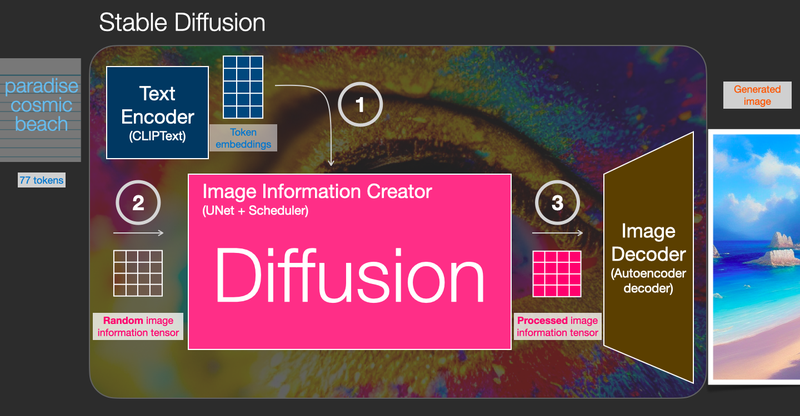  
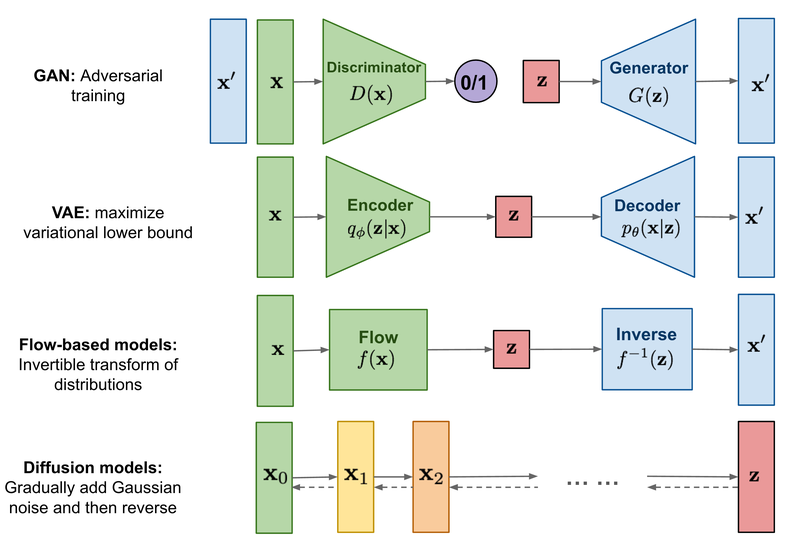  

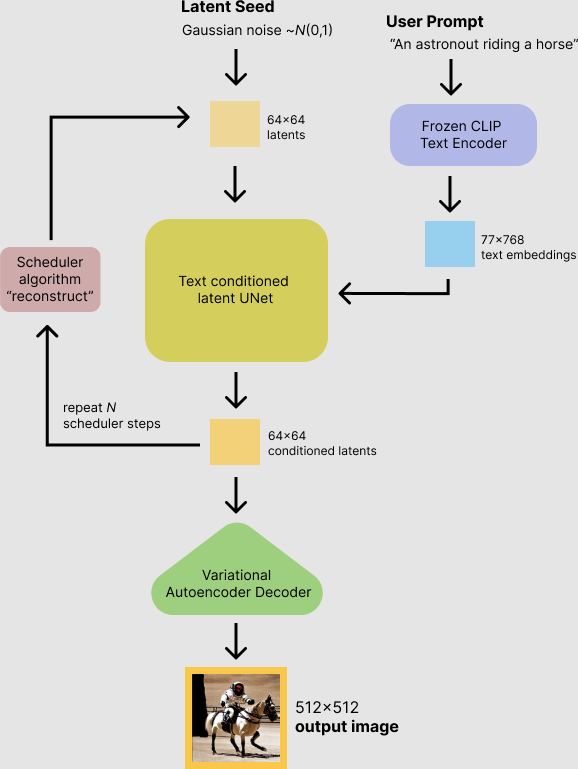  

SD 모델은 학습과정에서 Image, text 와 noise 를 입력받아, 노이즈를 단계적으로 제거하면서 이미지를 복원하는 과정을 배우게 되고,
추론과정에서는 입력 이미지 없이도, text 등의 조건과 noise 만으로 새로운 Image 를 생성하는 작업을 수행한다  

- [The Illustrated Stable Diffusion]()
- [How does Stable Diffusion work?]()
- [Denoising Diffusion Probabilistic Model - Keras tutorial](https://keras.io/examples/generative/ddpm/)
- [Denoising Diffusion Implicit Models - Keras tutorial](https://keras.io/examples/generative/ddim/)
